# Data Exploration

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools

In [4]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
plt.style.reload_library()
import matplotlib.patches as mpatches
from src.constants import GBL_INCHI_KEY, DMSO_INCHI_KEY, DMF_INCHI_KEY, \
                        INCHI_TO_CHEMNAME, TARGET_COL, RXN_FEAT_NAME, ORGANOAMONIUM_INCHI_KEY_COL

In [5]:
from src.config import chemical_inventory_path, raw_data_path
from src.data import utils as data_utils
from src import plot_utils

In [6]:
%cd ../..

/home/belu/VS Workplace/licentiate-thesis-repo


## EDA: raw data

In [30]:
import src.data.notebook_utils as utils


solvents_inchies = [GBL_INCHI_KEY, DMSO_INCHI_KEY, DMF_INCHI_KEY]
solvents = [INCHI_TO_CHEMNAME[inchie] for inchie in solvents_inchies]

plot_solvents = {'Gamma-Butyrolactone': "GBL",
                 'Dimethyl sulfoxide':"DMSO",
                 'Dimethylformamide': "DMF"}

solvents_data = {INCHI_TO_CHEMNAME[solvent_inchie]: utils.read_data(raw_data_path, organic_key=True,\
                                                                    solvent=solvent_inchie,
                                                                    binary_cristal_score=False) \
                 for solvent_inchie in solvents_inchies}

In [31]:
for key, val in solvents_data.items():
    print(key, len(val))

Gamma-Butyrolactone 6096
Dimethyl sulfoxide 864
Dimethylformamide 1096


In [32]:
def add_column(df, solvent):
    df['solvent'] = solvent
    return df

df = pd.concat([data.apply(add_column, axis=1, args=(solvent,)) \
                             for solvent, data in solvents_data.items()], axis=0)\
                            .reset_index(drop=True)

In [33]:
df.columns

Index(['_feat_WienerPolarity', '_feat_BondCount', '_feat_fr_NH0',
       '_feat_Refractivity', '_feat_LargestRingSize', '_feat_fr_ArN',
       '_feat_HeteroaliphaticRingCount', '_feat_fr_quatN', '_feat_msareaVDWp',
       '_feat_AromaticAtomCount', '_feat_AtomCount_C', '_feat_fr_amidine',
       '_feat_CyclomaticNumber', '_feat_LengthPerpendicularToTheMinArea',
       '_feat_fr_guanido', '_feat_donorcount', '_feat_molsurfaceareaVDWp',
       '_feat_fr_NH2', '_feat_minimalprojectionsize', '_feat_AtomCount_N',
       '_feat_ChiralCenterCount', '_feat_WienerIndex', '_feat_AvgPol',
       '_feat_donsitecount', '_feat_Hacceptorcount', '_feat_ASA-',
       '_feat_ProtPolarSurfaceArea', '_feat_fr_Ar_NH',
       '_feat_HeteroaromaticRing Count', '_feat_Accsitecount',
       '_feat_acceptorcount', '_feat_ASA', '_feat_CarboaromaticRingCount',
       '_feat_BalabanIndex', '_feat_SmallestRingSize', '_feat_RingAtomCount',
       '_feat_msareaASAp', '_feat_PolarSurfaceArea',
       '_feat_MinimalPro

In [34]:
chemical_info = utils.read_chemical_info()

In [35]:
chemical_info.shape

(73, 9)

In [36]:
df = df.set_index('_rxn_organic-inchikey').join(chemical_info.set_index('InChI Key (ID)'), 
                                                how='left').reset_index().rename({'index': '_rxn_organic-inchikey'}, 
                                                axis='columns')

In [37]:
cols = df.columns.to_list()
cols.sort()
cols

['Canonical SMILES String',
 'Chemical Abbreviation',
 'Chemical Category',
 'Chemical Name',
 'Density            (g/mL)',
 'InChI=',
 'Molecular Formula',
 'Molecular Weight (g/mol)',
 '_feat_ASA',
 '_feat_ASA+',
 '_feat_ASA-',
 '_feat_ASA_H',
 '_feat_ASA_P',
 '_feat_Accsitecount',
 '_feat_Aliphatic AtomCount',
 '_feat_AliphaticRingCount',
 '_feat_AromaticAtomCount',
 '_feat_AromaticRingCount',
 '_feat_AtomCount_C',
 '_feat_AtomCount_N',
 '_feat_AvgPol',
 '_feat_BalabanIndex',
 '_feat_BondCount',
 '_feat_CarboRingCount',
 '_feat_CarboaliphaticRingCount',
 '_feat_CarboaromaticRingCount',
 '_feat_ChainAtomCount',
 '_feat_ChiralCenterCount',
 '_feat_CyclomaticNumber',
 '_feat_Hacceptorcount',
 '_feat_Hdonorcount',
 '_feat_HeteroaliphaticRingCount',
 '_feat_HeteroaromaticRing Count',
 '_feat_HyperWienerIndex',
 '_feat_LargestRingSize',
 '_feat_LengthPerpendicularToTheMaxArea',
 '_feat_LengthPerpendicularToTheMinArea',
 '_feat_MaximalProjectionArea',
 '_feat_MaximalProjectionRadius',
 '_f

In [38]:
df.shape

(8056, 81)

## Numerical data: distribution

### Reaction features

In [39]:
cols = list(columns['_rxn_'])

NameError: name 'columns' is not defined

In [40]:
cols

['Canonical SMILES String',
 'Chemical Abbreviation',
 'Chemical Category',
 'Chemical Name',
 'Density            (g/mL)',
 'InChI=',
 'Molecular Formula',
 'Molecular Weight (g/mol)',
 '_feat_ASA',
 '_feat_ASA+',
 '_feat_ASA-',
 '_feat_ASA_H',
 '_feat_ASA_P',
 '_feat_Accsitecount',
 '_feat_Aliphatic AtomCount',
 '_feat_AliphaticRingCount',
 '_feat_AromaticAtomCount',
 '_feat_AromaticRingCount',
 '_feat_AtomCount_C',
 '_feat_AtomCount_N',
 '_feat_AvgPol',
 '_feat_BalabanIndex',
 '_feat_BondCount',
 '_feat_CarboRingCount',
 '_feat_CarboaliphaticRingCount',
 '_feat_CarboaromaticRingCount',
 '_feat_ChainAtomCount',
 '_feat_ChiralCenterCount',
 '_feat_CyclomaticNumber',
 '_feat_Hacceptorcount',
 '_feat_Hdonorcount',
 '_feat_HeteroaliphaticRingCount',
 '_feat_HeteroaromaticRing Count',
 '_feat_HyperWienerIndex',
 '_feat_LargestRingSize',
 '_feat_LengthPerpendicularToTheMaxArea',
 '_feat_LengthPerpendicularToTheMinArea',
 '_feat_MaximalProjectionArea',
 '_feat_MaximalProjectionRadius',
 '_f

In [41]:
cols_name_map = {
    '_rxn_M_inorganic': "reactivo inorgánico",
    '_rxn_M_organic': "reactivo orgánico",
    '_rxn_M_acid': "ácido",
    }

In [42]:
bright = plot_utils.tol_cset("bright")
bright_reorderd = [bright.blue, bright.purple, bright.cyan]

In [43]:
bright

Bcset(blue='#4477AA', cyan='#66CCEE', green='#228833', yellow='#CCBB44', red='#EE6677', purple='#AA3377', grey='#BBBBBB', black='#000000')

In [44]:
df["_rxn_M_acid"].max()

24.75515967847056

In [45]:
cols_name_map

{'_rxn_M_inorganic': 'reactivo inorgánico',
 '_rxn_M_organic': 'reactivo orgánico',
 '_rxn_M_acid': 'ácido'}

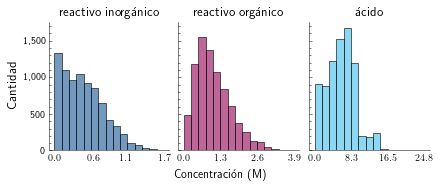

In [46]:
#sns.set_palette(sns.color_palette("Paired"))
#sns.set_context("paper")

plot_title = "figures/dist_reactivos"
with plt.style.context(['science', 'bright']):
    #sns.set_palette(sns.color_palette(color_bright))
 
    palette = itertools.cycle(bright_reorderd)
    fig, axes = plt.subplots(1, 3, sharey=True, sharex=False, figsize=(6,2.5),
                             constrained_layout = True)
    
    #fig.suptitle('Distribución de Reactivos')

    for index, col_name in enumerate(cols_name_map.keys()):
        color = next(palette)
        sns.histplot(data=df, x=col_name, ax=axes[index], common_norm=True, stat="count", color=color, bins=15)
        axes[index].set_title(cols_name_map[col_name], fontdict={"size": 13})
        axes[index].set_xlabel(None)
        axes[index].set_ylabel("Cantidad", fontdict={"size": 13})
        axes[index].set_xticks(np.round(np.linspace(0, df[col_name].max(), num=4), 1))
        axes[index].set(adjustable='box')
        fmt = '{x:,.0f}'
        tick = mtick.StrMethodFormatter(fmt)
        axes[index].yaxis.set_major_formatter(tick)
        axes[index].tick_params(which="both", left=True, bottom=False, top=False, right=False)
        sns.despine(bottom = False, left = False, trim=False)
    

    fig.supxlabel('Concentración (M)', fontdict={"size":12})
    #sns.color_palette()
    #fig.supylabel('Cantidad')
    #fig.savefig(plot_title+'.pdf', dpi=300)
    #fig.show()
    #plt.subplot_tool()

In [47]:
#sns.set_palette(sns.color_palette("Paired"))
#sns.set_context("paper")

plot_ttle = "figures/dist_reactivos"
with plt.style.context(['science', 'light']):
    light = sns.color_palette()
    #fig.supylabel('Cantidad')
    #fig.savefig(plot_ttle+'.pdf', dpi=300)
    #fig.show()
    #plt.subplot_tool()

In [48]:
bright

Bcset(blue='#4477AA', cyan='#66CCEE', green='#228833', yellow='#CCBB44', red='#EE6677', purple='#AA3377', grey='#BBBBBB', black='#000000')

In [51]:
light

[(0.4666666666666667, 0.6666666666666666, 0.8666666666666667),
 (0.9333333333333333, 0.5333333333333333, 0.4),
 (0.9333333333333333, 0.8666666666666667, 0.5333333333333333),
 (1.0, 0.6666666666666666, 0.7333333333333333),
 (0.6, 0.8666666666666667, 1.0),
 (0.26666666666666666, 0.7333333333333333, 0.6),
 (0.7333333333333333, 0.8, 0.2),
 (0.6666666666666666, 0.6666666666666666, 0.0),
 (0.8666666666666667, 0.8666666666666667, 0.8666666666666667)]

Interactive plot

fig = make_subplots(rows=len(cols), cols=1, subplot_titles=cols)

for index, col in enumerate(cols):
    plot = go.Histogram(y=df[col])
    fig.append_trace(plot, row=index+1, col=1)

fig.update_layout(height=1800, width=600, title_text="Histograma: condiciones de reacción", showlegend=False)
fig.update_layout(title={
                'x':0.6,
                'xanchor': 'center',
                'yanchor': 'top'})

## Crystal score

In [52]:
sns.set_context("notebook")

plot_title = "figures/dist_cristal.pdf"

map_crystal = {1:'Sin cristal', 2:'Polvo',3:'Pequeños cristales', 4:'Monocristales'} 

In [53]:
light = plot_utils.tol_cset("light")
light_reorderd = [light.mint, light.light_blue, light.light_cyan, light.orange]

In [54]:
map_color_crystal = {'Sin cristal':light.mint,'Polvo':light.light_blue,'Pequeños cristales':light.light_cyan, 'Monocristales':light.orange} 

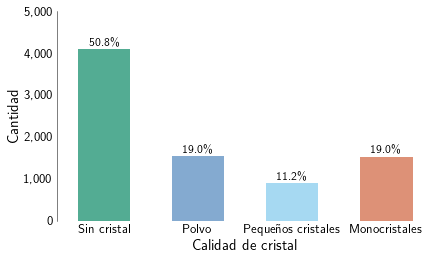

In [55]:
#plt.figure(figsize=(10, 7))

df['crystal_score_quality'] = df['_out_crystalscore'].map(map_crystal)
plot_title = "figures/total_data_by_cristal_score.pdf"
with plt.style.context(['science', 'light']):
    sns.set_palette(sns.color_palette(light_reorderd))
    
    fig, axes = plt.subplots(1, 1, sharey=True, sharex=False, figsize=(6,3.5),
                                 constrained_layout = True)
    ax = sns.countplot(x="crystal_score_quality", data=df,
                      order=["Sin cristal", "Polvo", "Pequeños cristales", "Monocristales"])
    #ax.set_title("Distribución Calidad de Cristal")
    
    # Add comma
    fmt = '{x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick) 
    
    # Add porcentage
    total = len(df)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}\%\n'
        width = p.get_width()
        new_width = width * 0.7
        p.set_width(new_width)
        x = p.get_x()
        p.set_x(x + (width - new_width) / 2)
    
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')

    # Remove box lines
    sns.despine(bottom = True, left = False, trim=False)
    ax.tick_params(which="both", left=False, bottom=False, top=False, right=False)
    #ax.xticks(fontdict={'fontsize':15})
    #ax.tick_params(axis='both', which='both')
    ax.set_xlabel("Calidad de cristal", fontdict={'fontsize':15})
    ax.set_ylabel("Cantidad", fontdict={'fontsize':15})
    #plt.xticks()
    plt.xticks(fontsize=13, rotation=0)
    plt.yticks(fontsize=13, rotation=0)
    plt.ylim(0,5000)
    #ax.set(adjustable='box')
    #fig.savefig(plot_title, dpi=300)

### Based on organic compound: inchikeys

In [56]:
chemical_names = utils.read_chemical_info()

In [57]:
chemical_names.shape

(73, 9)

In [58]:
#chemical_names[['Chemical Abbreviation', 'InChI Key (ID)']].dropna()
#df = df.set_index('_rxn_organic-inchikey').join(chemical_names.set_index('InChI Key (ID)'), how='inner').reset_index().rename({'index': '_rxn_organic-inchikey'}, axis='columns')


In [59]:
df.columns

Index(['_rxn_organic-inchikey', '_feat_WienerPolarity', '_feat_BondCount',
       '_feat_fr_NH0', '_feat_Refractivity', '_feat_LargestRingSize',
       '_feat_fr_ArN', '_feat_HeteroaliphaticRingCount', '_feat_fr_quatN',
       '_feat_msareaVDWp', '_feat_AromaticAtomCount', '_feat_AtomCount_C',
       '_feat_fr_amidine', '_feat_CyclomaticNumber',
       '_feat_LengthPerpendicularToTheMinArea', '_feat_fr_guanido',
       '_feat_donorcount', '_feat_molsurfaceareaVDWp', '_feat_fr_NH2',
       '_feat_minimalprojectionsize', '_feat_AtomCount_N',
       '_feat_ChiralCenterCount', '_feat_WienerIndex', '_feat_AvgPol',
       '_feat_donsitecount', '_feat_Hacceptorcount', '_feat_ASA-',
       '_feat_ProtPolarSurfaceArea', '_feat_fr_Ar_NH',
       '_feat_HeteroaromaticRing Count', '_feat_Accsitecount',
       '_feat_acceptorcount', '_feat_ASA', '_feat_CarboaromaticRingCount',
       '_feat_BalabanIndex', '_feat_SmallestRingSize', '_feat_RingAtomCount',
       '_feat_msareaASAp', '_feat_PolarSurfac

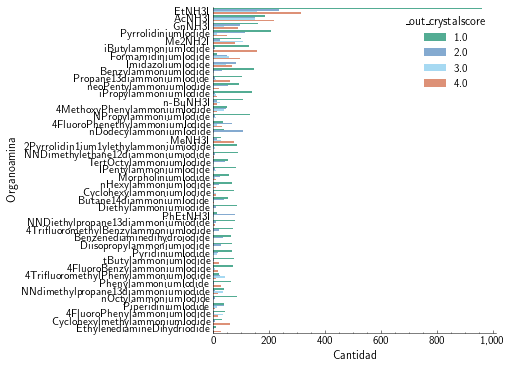

In [60]:
#plt.figure(figsize=(10, 7))

plot_title = "figures/dist_all_amines_by_score.pdf"

with plt.style.context(['science', 'light']):
    sns.set_palette(sns.color_palette(light_reorderd))
    
    fig, axes = plt.subplots(1, 1, sharey=True, sharex=False, figsize=(7,5),
                                 constrained_layout = True)
    ax = sns.countplot(y="Chemical Abbreviation", data=df, orient='h',
                      order = df["Chemical Abbreviation"].value_counts().index, hue=TARGET_COL)
    #ax.set_title("Distribución Calidad de Cristal")
    
    # Add comma
    fmt = '{x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.xaxis.set_major_formatter(tick) 
    
    # Remove box lines
    sns.despine(bottom = False, left = False, trim=False)
    ax.tick_params(which="both", left=False, bottom=True, top=False, right=False)
    
    #ax.tick_params(axis='both', which='both')
    ax.set_xlabel("Cantidad")
    ax.set_ylabel("Organoamina")
    #plt.xticks()
    #ax.set(adjustable='box')
    #fig.savefig(plot_title, dpi=300)

In [61]:
df['no_crystal'] = np.where(df['crystal_score_quality']=="Monocristales", 'Cristaliza', 'No cristaliza')

In [62]:
df["no_crystal"].value_counts()

No cristaliza    6527
Cristaliza       1529
Name: no_crystal, dtype: int64

Important amines (good distribution)

In [63]:
amines_selected = ["EtNH3I","AcNH3I","GnNH3I"] 

In [64]:
df_example = df[df["Chemical Abbreviation"].isin(amines_selected)]

crystal_values = list(map_crystal.values())

amines_counts_by_crystal = df_example.groupby(["Chemical Abbreviation", "crystal_score_quality"]).size().unstack(fill_value=0)
#.reindex(crystal_values, fill_value=0)

amines_no_crystal = dict(amines_counts_by_crystal.drop("Monocristales", axis=1).sum(axis=1))
amines_no_crystal

{'AcNH3I': 483, 'EtNH3I': 1355, 'GnNH3I': 295}

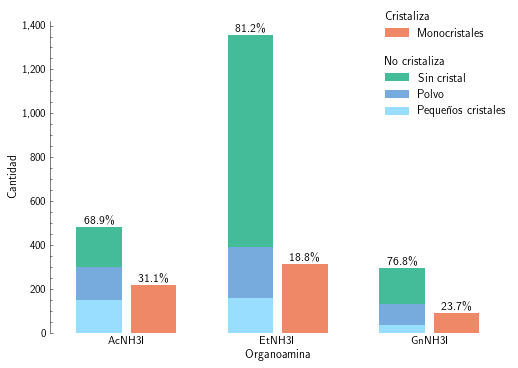

In [65]:
plot_title = "figures/dist_regular_amines_cristal.pdf"

with plt.style.context(['science', 'light']):
    sns.set_palette(sns.color_palette(light_reorderd))
    
    fig, ax = plt.subplots(1, 1, sharey=True, sharex=True, figsize=(7,5),
                                 constrained_layout = True)
    amines_counts_by_crystal.iloc[:,:1].plot.bar(stacked=True, position=-0.1, width=.3, ax=ax, color=light.orange, label="Monocristales")
    amines_counts_by_crystal.iloc[:,1:].plot.bar(stacked=True, position=1.1, width=.3, ax=ax, color=map_color_crystal)
    ax.set_xlim(-0.5, len(amines_counts_by_crystal)-0.5)

    # Add comma
    fmt = '{x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick) 
    
    # Remove box lines
    sns.despine(bottom = True, left = False, trim=False)
    ax.tick_params(which="both", left=True, bottom=False, top=False, right=False)
    
    #ax.tick_params(axis='both', which='both')
    ax.set_ylabel("Cantidad")
    ax.set_xlabel("Organoamina")
    plt.xticks(rotation=0)
    #ax.set(adjustable='box')
    #fig.savefig(plot_title, dpi=300)
    
    locs, labels = plt.xticks() 
    # Add porcentage
    for p, label in zip(ax.patches[0:3], labels):
        amine_name = label.get_text()
        total = len(df[df["Chemical Abbreviation"] == amine_name])
        percentage = f'{100 * (p.get_x() + p.get_height()) / total:.1f}\%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')

    for p, label in zip(ax.patches[9:12], labels):
        amine_name = label.get_text()
        total = len(df[df["Chemical Abbreviation"] == amine_name])
        percentage = f'{100 * amines_no_crystal[amine_name] / total:.1f}\%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')
        
    patches = []
    for name, color in map_color_crystal.items():
        patches.append(mpatches.Patch(facecolor=color, label=name))
    axbox = ax.get_position()
    
    legend_2=plt.legend(handles=patches[:-1], loc=(axbox.x0+0.6,  axbox.y0 + 0.55),
                        fontsize=12, title="No cristaliza")
    legend_2._legend_box.align = "left"
    legend_1=plt.legend(handles=[patches[-1]], loc=(axbox.x0+0.6, axbox.y0 + 0.8),
                        fontsize=12, title="Cristaliza")
    legend_1._legend_box.align = "left"
    # as soon as a second legend is made, the first disappears and needs to be added back again
    fig.add_artist(legend_2) 
    #fig.savefig(plot_title, dpi=300)
#python now knows that "figure" must take the "legend_1" along with "legend_2"
    #                    loc=1, fontsize='small', fancybox=False, ncol=2)
    
#ax = sns.countplot(y="Chemical Abbreviation", hue="no_crystal", data=df_example)  handles,labels

Other special amines

In [67]:
particular_amines = ["EthylenediamineDihydriodide",
                    "CyclohexylmethylammoniumIodide",
                     "CyclohexylammoniumIodide",
                     "iButylammoniumIodide"
                    ]

In [68]:
df_example = df[df["Chemical Abbreviation"].isin(particular_amines)]

crystal_values = list(map_crystal.values())

amines_counts_by_crystal = df_example.groupby(["Chemical Abbreviation", "crystal_score_quality"]).size().unstack(fill_value=0)
#.reindex(crystal_values, fill_value=0)

amines_no_crystal = dict(amines_counts_by_crystal.drop("Monocristales", axis=1).sum(axis=1))
amines_no_crystal

{'CyclohexylammoniumIodide': 86,
 'CyclohexylmethylammoniumIodide': 37,
 'EthylenediamineDihydriodide': 11,
 'iButylammoniumIodide': 133}

In [69]:
amines_counts_by_crystal

crystal_score_quality,Monocristales,Pequeños cristales,Polvo,Sin cristal
Chemical Abbreviation,,,,
CyclohexylammoniumIodide,10,11,1,74
CyclohexylmethylammoniumIodide,59,0,6,31
EthylenediamineDihydriodide,29,0,3,8
iButylammoniumIodide,157,0,5,128


In [70]:
amines_no_crystal

{'CyclohexylammoniumIodide': 86,
 'CyclohexylmethylammoniumIodide': 37,
 'EthylenediamineDihydriodide': 11,
 'iButylammoniumIodide': 133}

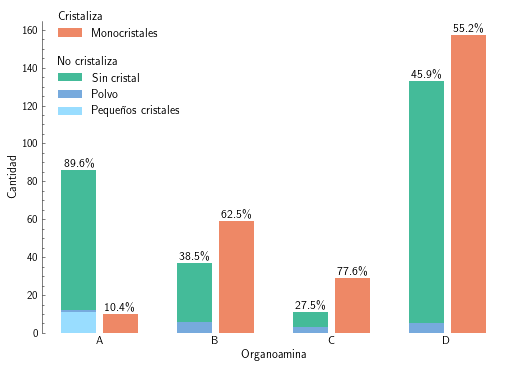

In [76]:
plot_title = "figures/dist_irregular_amines_cristal.pdf"

with plt.style.context(['science', 'light']):
    sns.set_palette(sns.color_palette(light_reorderd))
    
    fig, ax = plt.subplots(1, 1, sharey=True, sharex=True, figsize=(7,5),
                                 constrained_layout = True)
    amines_counts_by_crystal.iloc[:,:1].plot.bar(stacked=True, position=-0.1, width=.3, ax=ax, color=light.orange, label="Monocristales")
    amines_counts_by_crystal.iloc[:,1:].plot.bar(stacked=True, position=1.1, width=.3, ax=ax, color=map_color_crystal)
    ax.set_xlim(-0.5, len(amines_counts_by_crystal)-0.5)

    # Add comma
    fmt = '{x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick) 
    
    # Remove box lines
    sns.despine(bottom = True, left = False, trim=False)
    ax.tick_params(which="both", left=True, bottom=False, top=False, right=False)
    
    #ax.tick_params(axis='both', which='both')
    ax.set_ylabel("Cantidad")
    ax.set_xlabel("Organoamina")
    plt.xticks(rotation=0)
    #ax.set(adjustable='box')
    #fig.savefig(plot_title, dpi=300)
    
    locs, labels = plt.xticks() 
    # Add porcentage
    for p, label in zip(ax.patches[0:4], labels):
        amine_name = label.get_text()
        total = len(df[df["Chemical Abbreviation"] == amine_name])
        percentage = f'{100 * (p.get_x() + p.get_height()) / total:.1f}\%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')

    for p, label in zip(ax.patches[12:16], labels):
        amine_name = label.get_text()
        total = len(df[df["Chemical Abbreviation"] == amine_name])
        percentage = f'{100 * amines_no_crystal[amine_name] / total:.1f}\%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')
        
    patches = []
    for name, color in map_color_crystal.items():
        patches.append(mpatches.Patch(facecolor=color, label=name))
    axbox = ax.get_position()
    
    legend_2=plt.legend(handles=patches[:-1], loc=(axbox.x0-0.1,  axbox.y0 + 0.55),
                        fontsize=12, title="No cristaliza")
    legend_2._legend_box.align = "left"
    legend_1=plt.legend(handles=[patches[-1]], loc=(axbox.x0-0.1, axbox.y0 + 0.8),
                        fontsize=12, title="Cristaliza")
    legend_1._legend_box.align = "left"
    # as soon as a second legend is made, the first disappears and needs to be added back again
    fig.add_artist(legend_2) 
    
    ax.set_xticklabels(['A','B','C','D'])
    #fig.savefig(plot_title, dpi=300)
#python now knows that "figure" must take the "legend_1" along with "legend_2"
    #                    loc=1, fontsize='small', fancybox=False, ncol=2)
    
#ax = sns.countplot(y="Chemical Abbreviation", hue="no_crystal", data=df_example)  handles,labels

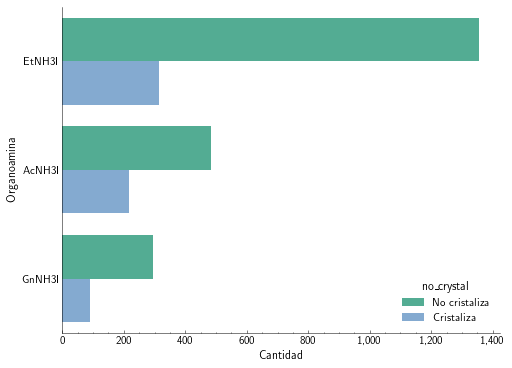

In [91]:
plot_title = "figures/dist_amines.pdf"

with plt.style.context(['science', 'light']):
    sns.set_palette(sns.color_palette(light_reorderd))
    
    fig, axes = plt.subplots(1, 1, sharey=True, sharex=False, figsize=(7,5),
                                 constrained_layout = True)
    ax = sns.countplot(y="Chemical Abbreviation", data=df_example, orient='h',
                      order = df_example["Chemical Abbreviation"].value_counts().index,
                       hue = "no_crystal"
                      )
    #ax.set_title("Distribución Calidad de Cristal")
    
    # Add comma
    fmt = '{x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.xaxis.set_major_formatter(tick) 
    
    # Remove box lines
    sns.despine(bottom = False, left = False, trim=False)
    ax.tick_params(which="both", left=False, bottom=True, top=False, right=False)
    
    #ax.tick_params(axis='both', which='both')
    ax.set_xlabel("Cantidad")
    ax.set_ylabel("Organoamina")
    #plt.xticks()
    #ax.set(adjustable='box')
    #fig.savefig(plot_title, dpi=300)
    
#ax = sns.countplot(y="Chemical Abbreviation", hue="no_crystal", data=df_example)

In [ ]:
df_groupedby_inchi = df.groupby(by=['Chemical Abbreviation', '_out_crystalscore'])
ax = df_groupedby_inchi.size().unstack().plot.barh(stacked=True, figsize=(10,15), label='Crystal Score')

ax.set_xlabel('Cantidad de filas')
ax.legend(title='Crystal score')
#plot(kind='bar', ylabel='Cantidad de filas', xlabel='Reactivo', fontsize=9, figsize=(20,7))

In [ ]:
df_groupedby_inchi.count().head()

In [ ]:
group_count = df_groupedby_inchi.count()

Analize if we take only a sample of EtNH3I

In [ ]:
chemical_names.loc[chemical_names['Chemical Abbreviation'] == 'EtNH3I']['InChI Key (ID)']


In [ ]:
len(df)

In [ ]:
filtered_df = df.drop(df.loc[df['_rxn_organic-inchikey'] == 'XFYICZOIWSBQSK-UHFFFAOYSA-N'].index)

In [ ]:
len(filtered_df)

In [ ]:
def plot(dfs, cols):
    fig = make_subplots(rows=len(cols), cols=1, subplot_titles=cols)

    for index, col in enumerate(cols):
        plot = go.Histogram(y=dfs[col])
        fig.append_trace(plot, row=index+1, col=1)

    fig.update_layout(height=1800, width=600, title_text="Histograma: condiciones de reacción", showlegend=False)
    fig.update_layout(title={
                    'x':0.6,
                    'xanchor': 'center',
                    'yanchor': 'top'})
    fig.show()

In [ ]:
plot(filtered_df, cols)

In [ ]:
df_groupedby_inchi = filtered_dfb.groupby(by=['Chemical Abbreviation', '_out_crystalscore'])
ax = df_groupedby_inchi.size().unstack().plot.barh(stacked=True, figsize=(10,15), label='Crystal Score')

ax.set_xlabel('Cantidad de experimentos')
ax.legend(title='Crystal score')
#plot(kind='bar', ylabel='Cantidad de filas', xlabel='Reactivo', fontsize=9, figsize=(20,7))

In [ ]:
crystal_score = filtered_df['_out_crystalscore'].astype(int)
selected_data = data_utils.filter_required_data(filtered_df, "solUD-feat")